# Unsupervised ML (Clustering)

Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.

Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.
#### Problem Statements : 

4.1  "Create 3 clusters as below.
1. Sensitive Area's
2. Moderate Area's
3. Peaceful Area's"

4.2  Create DataFrame for each cluster that shows data according to the areas.

4.3  "Analyse your clusters and prepare a report that explains all your observations.  
Example -   
1. What is impacting more crimes in sensitive areas. 
2. What needs to be done to reduce crime. 
3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

4.4   Capstone project overall story in your own words. Min 1000 words.

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading and Merging the different CSV files which are required for analysis

#### IPC Crimes Dataset

In [2]:
df1=pd.read_csv("C:\\Users\\rashm\\Desktop\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df1.head(2)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125


#### Crimes against Women Dataset

In [3]:
df2=pd.read_csv("C:\\Users\\rashm\\Desktop\\42_District_wise_crimes_committed_against_women_2001_2012.csv")
df2.head(2)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0


In [4]:
#Summing up the total crime against women
df2['TOTAL CRIMES AGAINST WOMEN']=df2.iloc[:,3:].sum(axis=1)

In [5]:
df2.head(2)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356


#### Crimes against Children dataset

In [6]:
df3=pd.read_csv("C:\\Users\\rashm\\Desktop\\03_District_wise_crimes_committed_against_children_2001_2012.csv")
df3.head(2)

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66


In [7]:
#As it has already total value column so only renaming
df3.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [8]:
df3.head(2)

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66


#### Crimes against SC Dataset

In [9]:
df4=pd.read_csv("C:\\Users\\rashm\\Desktop\\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
df4.head(2)

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53


In [10]:
df4['TOTAL CRIMES AGAINST SC']=df4.iloc[:,3:].sum(axis=1)

In [11]:
df4.head(2)

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32,55
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53,127


#### Crimes against ST dataset

In [12]:
df5=pd.read_csv("C:\\Users\\rashm\\Desktop\\02_District_wise_crimes_committed_against_ST_2001_2012.csv")
df5.head(2)

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6


In [13]:
df5['TOTAL CRIMES AGAINST ST']=df5.iloc[:,3:].sum(axis=1)

In [14]:
df5.head(2)

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13,18
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6,14


#### Creating final dataset by taking necessary columns from others

In [56]:
df_final=pd.concat([df1,df2['TOTAL CRIMES AGAINST WOMEN'],df3['TOTAL CRIMES AGAINST CHILDREN'],df4['TOTAL CRIMES AGAINST SC'],df5['TOTAL CRIMES AGAINST ST']],axis=1)


In [16]:
df_final.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,34.0,175.0,0.0,181.0,1518.0,4154.0,454.0,0.0,55,18
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,24.0,154.0,0.0,270.0,754.0,4125.0,356.0,66.0,127,14
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,83.0,186.0,0.0,404.0,1262.0,5818.0,456.0,0.0,114,2
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,38.0,57.0,0.0,233.0,1181.0,3140.0,278.0,0.0,100,4
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,58.0,247.0,0.0,431.0,2313.0,6507.0,475.0,0.0,89,14


In [17]:
#checking the dimension of the dataset
df_final.shape

(9018, 37)

Our final dataset consits of 9018 rows and 37 columns

In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9018 entries, 0 to 9017
Data columns (total 37 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             9017 non-null   object 
 1   DISTRICT                                             9017 non-null   object 
 2   YEAR                                                 9017 non-null   float64
 3   MURDER                                               9017 non-null   float64
 4   ATTEMPT TO MURDER                                    9017 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   float64
 6   RAPE                                                 9017 non-null   float64
 7   CUSTODIAL RAPE                                       9017 non-null   float64
 8   OTHER RAPE                                           9017 non-null  

From above we can see the column names and the data types of the columns and about the null values.

In [57]:
#checking for the missing values
df_final.isnull().sum()

STATE/UT                                               1
DISTRICT                                               1
YEAR                                                   1
MURDER                                                 1
ATTEMPT TO MURDER                                      1
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              1
RAPE                                                   1
CUSTODIAL RAPE                                         1
OTHER RAPE                                             1
KIDNAPPING & ABDUCTION                                 1
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            1
KIDNAPPING AND ABDUCTION OF OTHERS                     1
DACOITY                                                1
PREPARATION AND ASSEMBLY FOR DACOITY                   1
ROBBERY                                                1
BURGLARY                                               1
THEFT                                                  1
AUTO THEFT                     

We can see the missing values in our dataset which is very less , we can drop them.

In [58]:
df_final = df_final.dropna()

In [59]:
df_final.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [22]:
df_final .shape

(9015, 37)

We can see only 3 rows has been deleted.As our dataset is large,it will not effect much.

In [60]:
#As we have seen 'TOTAL' name in district column 
df_final['DISTRICT'].value_counts()

TOTAL              407
G.R.P.              46
SOUTH               37
NORTH               37
WEST                36
                  ... 
RAILWAYS KMR         1
MIDNAPUR             1
A and N ISLANDS      1
KAWARDHA             1
CAR                  1
Name: DISTRICT, Length: 808, dtype: int64

In [61]:
#As we have seen 'DELHI UT TOTAL' name in district column in csv file
(df_final['DISTRICT']=='DELHI UT TOTAL').value_counts()

False    9003
True       12
Name: DISTRICT, dtype: int64

Here we can see TOTAL in district column and count of it which is not required.

In [62]:
df_final=df_final[df_final['DISTRICT']!='TOTAL']

In [63]:
df_final=df_final[df_final['DISTRICT']!='DELHI UT TOTAL']

In [64]:
df_final['DISTRICT'].value_counts()

G.R.P.             46
SOUTH              37
NORTH              37
WEST               36
RAILWAYS           35
                   ..
RAILWAYS KMR        1
MIDNAPUR            1
A and N ISLANDS     1
KAWARDHA            1
CAR                 1
Name: DISTRICT, Length: 806, dtype: int64

Now we can see the TOTAL and DELHI UT TOTAL has been removed from the DISTRICT column.

#### As we already have "TOTAL CRIMES AGAINST WOMEN" column so dropping the columns related to Women and common for df1 and df2 and 'TOTAL IPC CRIMES' column as we have already different columns related to IPC crimes and other not much important columns for analysis.

In [65]:
df_final .drop(['RAPE','CUSTODIAL RAPE','OTHER RAPE','DOWRY DEATHS','INSULT TO MODESTY OF WOMEN','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','TOTAL IPC CRIMES','OTHER IPC CRIMES','AUTO THEFT','OTHER THEFT','PREPARATION AND ASSEMBLY FOR DACOITY','CRIMINAL BREACH OF TRUST','CAUSING DEATH BY NEGLIGENCE'],axis=1, inplace=True)

In [66]:
df_final.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,46.0,9.0,41.0,198.0,199.0,78.0,104.0,1.0,30.0,1131.0,454.0,0.0,55,18
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,53.0,8.0,16.0,191.0,366.0,168.0,65.0,8.0,69.0,1543.0,356.0,66.0,127,14
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,59.0,4.0,14.0,237.0,723.0,156.0,209.0,9.0,38.0,2088.0,456.0,0.0,114,2
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,25.0,1.0,4.0,98.0,173.0,164.0,37.0,2.0,23.0,795.0,278.0,0.0,100,4
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,49.0,4.0,25.0,437.0,1021.0,70.0,220.0,3.0,41.0,1244.0,475.0,0.0,89,14


In [43]:
df_final.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
count,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000,8596.000000
mean,2006.634714,46.826315,40.944160,41.512331,6.910656,28.880177,129.977082,407.160656,147.738599,259.422057,90.137040,89.288274,3.107608,13.225221,392.187529,238.193695,55.777106,69.808632,12.757562
std,3.463783,42.757595,50.592362,56.064790,10.946224,50.940039,195.405986,778.813999,370.855819,467.608914,137.600095,183.983852,8.116641,30.416814,559.609844,291.531062,263.230052,323.825989,63.426896
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.000000,10.000000,9.000000,1.000000,6.000000,29.000000,86.000000,11.000000,62.000000,10.000000,12.000000,0.000000,2.000000,40.000000,62.000000,0.000000,1.000000,0.000000
50%,2007.000000,37.000000,27.000000,24.000000,3.000000,16.000000,79.500000,206.000000,45.000000,145.000000,44.000000,35.000000,1.000000,8.000000,191.000000,162.000000,11.000000,18.000000,0.000000
75%,2010.000000,63.000000,54.000000,52.000000,9.000000,34.000000,164.250000,430.000000,127.000000,291.250000,116.000000,93.000000,3.000000,18.000000,490.000000,308.000000,38.000000,61.000000,8.000000
max,2012.000000,542.000000,741.000000,587.000000,219.000000,1131.000000,3175.000000,13195.000000,7074.000000,9028.000000,3181.000000,3155.000000,170.000000,2350.000000,4837.000000,4556.000000,6033.000000,8009.000000,1501.000000


From the above we can see the maximum,minimum and the mean value of each column.

#### GROUPING BY STATE/UT,DISTRICT AND SUMMING ALL THE CRIMES OVER THE YEARS

In [67]:
df_final=df_final.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['YEAR'],axis=1)

In [68]:
df_final

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
0,A & N ISLANDS,A and N ISLANDS,15.0,19.0,12.0,5.0,9.0,90.0,112.0,17.0,23.0,1.0,11.0,99.0,54.0,10.0,4,5
1,A & N ISLANDS,ANDAMAN,118.0,41.0,73.0,4.0,63.0,708.0,918.0,115.0,196.0,9.0,80.0,910.0,458.0,143.0,187,142
2,A & N ISLANDS,CAR,2.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,4.0,2.0,19.0,85,91
3,A & N ISLANDS,NICOBAR,12.0,2.0,1.0,1.0,0.0,23.0,23.0,0.0,3.0,0.0,3.0,34.0,11.0,374.0,0,33
4,A & N ISLANDS,NORTH,5.0,0.0,0.0,0.0,1.0,6.0,13.0,0.0,3.0,0.0,0.0,8.0,9.0,28.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,WEST BENGAL,PURULIA,733.0,12.0,276.0,63.0,278.0,49.0,2526.0,920.0,376.0,1.0,24.0,205.0,3180.0,6.0,35,6
823,WEST BENGAL,SEALDAH G.R.P.,188.0,58.0,67.0,18.0,115.0,0.0,2981.0,128.0,94.0,9.0,0.0,247.0,134.0,196.0,7,9
824,WEST BENGAL,SILIGURI G.R.P.,42.0,3.0,31.0,13.0,15.0,1.0,1154.0,26.0,6.0,3.0,0.0,0.0,61.0,3411.0,0,0
825,WEST BENGAL,SILIGURI_PC,32.0,6.0,123.0,3.0,29.0,3.0,849.0,9.0,195.0,0.0,3.0,812.0,552.0,1706.0,0,0


## 4.1  "Create 3 clusters as below.
1. Sensitive Area's
2. Moderate Area's
3. Peaceful Area's

In [69]:
x=df_final.iloc[:,2:]
x.head(2)

,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
0,15.0,19.0,12.0,5.0,9.0,90.0,112.0,17.0,23.0,1.0,11.0,99.0,54.0,10.0,4,5
1,118.0,41.0,73.0,4.0,63.0,708.0,918.0,115.0,196.0,9.0,80.0,910.0,458.0,143.0,187,142


### Data Scaling using Standard Scaler

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled = scaler.fit_transform(x)
print(df_scaled)
x1 = pd.DataFrame(df_scaled)

[[-0.98741685 -0.85425996 -0.78985233 ... -0.29632547 -0.26886399
  -0.24581904]
 [-0.77181537 -0.80803623 -0.67499547 ... -0.22715351 -0.20067968
   0.01809942]
 [-1.01462869 -0.89418045 -0.81056422 ... -0.29164466 -0.23868405
  -0.0801476 ]
 ...
 [-0.93089996 -0.88787722 -0.75407724 ...  1.4725003  -0.27035436
  -0.2554511 ]
 [-0.95183214 -0.88157398 -0.58085051 ...  0.58574701 -0.27035436
  -0.2554511 ]
 [ 0.3166581   1.33716506  1.18154318 ...  0.75321596 -0.27035436
  -0.23811339]]


### K-means Clustering

In [71]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=0) #As we need 3 clusters

In [72]:
kmeans=KMeans(n_clusters=3,random_state=0)

In [73]:
y_kmeans=kmeans.fit_predict(x1)

In [74]:
cluster1=df_final[y_kmeans==2]

In [75]:
cluster1

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
10,ANDHRA PRADESH,CYBERABAD,1810.0,914.0,1398.0,141.0,765.0,11946.0,29665.0,559.0,11423.0,88.0,491.0,32697.0,15411.0,12.0,1419,199
15,ANDHRA PRADESH,HYDERABAD CITY,1455.0,1563.0,1466.0,121.0,942.0,13435.0,56167.0,2432.0,22504.0,311.0,433.0,47343.0,19685.0,1564.0,1417,192
121,BIHAR,PATNA,4586.0,2845.0,3502.0,951.0,4901.0,6855.0,23942.0,5948.0,4833.0,121.0,284.0,7533.0,5931.0,168.0,524,18
193,GUJARAT,AHMEDABAD COMMR.,1204.0,778.0,2301.0,471.0,5292.0,9392.0,57655.0,2434.0,3173.0,146.0,79.0,16439.0,14973.0,51.0,315,18
330,KARNATAKA,BANGALORE COMMR.,2831.0,4067.0,3014.0,529.0,6740.0,19968.0,105434.0,4665.0,26401.0,772.0,48.0,37973.0,9010.0,394.0,1052,115
412,MADHYA PRADESH,INDORE,1339.0,1810.0,625.0,73.0,2326.0,11729.0,40882.0,1616.0,1788.0,59.0,507.0,20260.0,10392.0,1046.0,1330,606
462,MAHARASHTRA,MUMBAI,1254.0,712.0,793.0,213.0,1600.0,14163.0,54936.0,944.0,6694.0,584.0,38.0,18382.0,4251.0,386.0,67,2
463,MAHARASHTRA,MUMBAI COMMR.,1542.0,1063.0,1334.0,226.0,3209.0,19916.0,85365.0,2364.0,13577.0,708.0,218.0,28353.0,9304.0,902.0,327,1
465,MAHARASHTRA,NAGPUR COMMR.,1175.0,756.0,646.0,198.0,2963.0,12414.0,27488.0,2555.0,3210.0,179.0,240.0,10923.0,4876.0,520.0,49,6
475,MAHARASHTRA,PUNE COMMR.,1317.0,1123.0,1087.0,309.0,3667.0,13165.0,48898.0,6489.0,6648.0,241.0,224.0,13740.0,6283.0,887.0,383,21


As in "cluster1" all crime values are very high, so it comes under "Sensitive Areas"

In [76]:
cluster2=df_final[y_kmeans==1]
cluster2

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
6,ANDHRA PRADESH,ADILABAD,1186.0,869.0,754.0,72.0,237.0,2519.0,3964.0,1016.0,1932.0,33.0,395.0,16392.0,8583.0,336.0,402,49
7,ANDHRA PRADESH,ANANTAPUR,1922.0,1248.0,839.0,137.0,244.0,2536.0,6079.0,1293.0,1445.0,114.0,444.0,17682.0,5287.0,536.0,1151,303
8,ANDHRA PRADESH,CHITTOOR,1270.0,739.0,907.0,96.0,207.0,2777.0,11077.0,973.0,2694.0,171.0,419.0,13543.0,8004.0,574.0,1323,302
9,ANDHRA PRADESH,CUDDAPAH,1196.0,506.0,653.0,39.0,106.0,1549.0,4530.0,1326.0,1894.0,48.0,337.0,14301.0,5002.0,235.0,1371,17
11,ANDHRA PRADESH,EAST GODAVARI,1041.0,1211.0,780.0,30.0,245.0,5069.0,13533.0,768.0,3273.0,225.0,479.0,31514.0,9514.0,310.0,2000,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,WEST BENGAL,MURSHIDABAD,1644.0,2657.0,2943.0,152.0,391.0,114.0,7833.0,3143.0,1125.0,281.0,248.0,18652.0,27004.0,67.0,7,16
819,WEST BENGAL,NADIA,1355.0,1869.0,2532.0,239.0,385.0,166.0,11523.0,2446.0,1568.0,109.0,153.0,14539.0,17582.0,48.0,10,8
820,WEST BENGAL,PASCHIM MIDNAPUR,1350.0,706.0,806.0,224.0,397.0,250.0,4596.0,3337.0,493.0,39.0,249.0,1298.0,7875.0,44.0,0,1
821,WEST BENGAL,PURAB MIDNAPUR,707.0,166.0,1042.0,92.0,184.0,156.0,3320.0,4082.0,614.0,18.0,68.0,113.0,7020.0,7.0,6,11


As in "cluster2" all crime values are in medium range, so it comes under "Moderate Areas"

In [77]:
cluster3=df_final[y_kmeans==0]

In [78]:
cluster3

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
0,A & N ISLANDS,A and N ISLANDS,15.0,19.0,12.0,5.0,9.0,90.0,112.0,17.0,23.0,1.0,11.0,99.0,54.0,10.0,4,5
1,A & N ISLANDS,ANDAMAN,118.0,41.0,73.0,4.0,63.0,708.0,918.0,115.0,196.0,9.0,80.0,910.0,458.0,143.0,187,142
2,A & N ISLANDS,CAR,2.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,4.0,2.0,19.0,85,91
3,A & N ISLANDS,NICOBAR,12.0,2.0,1.0,1.0,0.0,23.0,23.0,0.0,3.0,0.0,3.0,34.0,11.0,374.0,0,33
4,A & N ISLANDS,NORTH,5.0,0.0,0.0,0.0,1.0,6.0,13.0,0.0,3.0,0.0,0.0,8.0,9.0,28.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,WEST BENGAL,MIDNAPUR,120.0,20.0,74.0,16.0,59.0,39.0,581.0,363.0,27.0,1.0,23.0,63.0,741.0,0.0,0,0
822,WEST BENGAL,PURULIA,733.0,12.0,276.0,63.0,278.0,49.0,2526.0,920.0,376.0,1.0,24.0,205.0,3180.0,6.0,35,6
823,WEST BENGAL,SEALDAH G.R.P.,188.0,58.0,67.0,18.0,115.0,0.0,2981.0,128.0,94.0,9.0,0.0,247.0,134.0,196.0,7,9
824,WEST BENGAL,SILIGURI G.R.P.,42.0,3.0,31.0,13.0,15.0,1.0,1154.0,26.0,6.0,3.0,0.0,0.0,61.0,3411.0,0,0


As in cluster3 all values are low, so it comes under "Peaceful Area's"

## 4.2 Create DataFrame for each cluster that shows data according to the areas.

### 1. Sensitive Area's

In [86]:
Sensitive_Area=cluster1

In [87]:
Sensitive_Area

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
10,ANDHRA PRADESH,CYBERABAD,1810.0,914.0,1398.0,141.0,765.0,11946.0,29665.0,559.0,11423.0,88.0,491.0,32697.0,15411.0,12.0,1419,199
15,ANDHRA PRADESH,HYDERABAD CITY,1455.0,1563.0,1466.0,121.0,942.0,13435.0,56167.0,2432.0,22504.0,311.0,433.0,47343.0,19685.0,1564.0,1417,192
121,BIHAR,PATNA,4586.0,2845.0,3502.0,951.0,4901.0,6855.0,23942.0,5948.0,4833.0,121.0,284.0,7533.0,5931.0,168.0,524,18
193,GUJARAT,AHMEDABAD COMMR.,1204.0,778.0,2301.0,471.0,5292.0,9392.0,57655.0,2434.0,3173.0,146.0,79.0,16439.0,14973.0,51.0,315,18
330,KARNATAKA,BANGALORE COMMR.,2831.0,4067.0,3014.0,529.0,6740.0,19968.0,105434.0,4665.0,26401.0,772.0,48.0,37973.0,9010.0,394.0,1052,115
412,MADHYA PRADESH,INDORE,1339.0,1810.0,625.0,73.0,2326.0,11729.0,40882.0,1616.0,1788.0,59.0,507.0,20260.0,10392.0,1046.0,1330,606
462,MAHARASHTRA,MUMBAI,1254.0,712.0,793.0,213.0,1600.0,14163.0,54936.0,944.0,6694.0,584.0,38.0,18382.0,4251.0,386.0,67,2
463,MAHARASHTRA,MUMBAI COMMR.,1542.0,1063.0,1334.0,226.0,3209.0,19916.0,85365.0,2364.0,13577.0,708.0,218.0,28353.0,9304.0,902.0,327,1
465,MAHARASHTRA,NAGPUR COMMR.,1175.0,756.0,646.0,198.0,2963.0,12414.0,27488.0,2555.0,3210.0,179.0,240.0,10923.0,4876.0,520.0,49,6
475,MAHARASHTRA,PUNE COMMR.,1317.0,1123.0,1087.0,309.0,3667.0,13165.0,48898.0,6489.0,6648.0,241.0,224.0,13740.0,6283.0,887.0,383,21


### 2. Moderate Area's

In [88]:
Moderate_Area=cluster2

In [89]:
Moderate_Area

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
6,ANDHRA PRADESH,ADILABAD,1186.0,869.0,754.0,72.0,237.0,2519.0,3964.0,1016.0,1932.0,33.0,395.0,16392.0,8583.0,336.0,402,49
7,ANDHRA PRADESH,ANANTAPUR,1922.0,1248.0,839.0,137.0,244.0,2536.0,6079.0,1293.0,1445.0,114.0,444.0,17682.0,5287.0,536.0,1151,303
8,ANDHRA PRADESH,CHITTOOR,1270.0,739.0,907.0,96.0,207.0,2777.0,11077.0,973.0,2694.0,171.0,419.0,13543.0,8004.0,574.0,1323,302
9,ANDHRA PRADESH,CUDDAPAH,1196.0,506.0,653.0,39.0,106.0,1549.0,4530.0,1326.0,1894.0,48.0,337.0,14301.0,5002.0,235.0,1371,17
11,ANDHRA PRADESH,EAST GODAVARI,1041.0,1211.0,780.0,30.0,245.0,5069.0,13533.0,768.0,3273.0,225.0,479.0,31514.0,9514.0,310.0,2000,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,WEST BENGAL,MURSHIDABAD,1644.0,2657.0,2943.0,152.0,391.0,114.0,7833.0,3143.0,1125.0,281.0,248.0,18652.0,27004.0,67.0,7,16
819,WEST BENGAL,NADIA,1355.0,1869.0,2532.0,239.0,385.0,166.0,11523.0,2446.0,1568.0,109.0,153.0,14539.0,17582.0,48.0,10,8
820,WEST BENGAL,PASCHIM MIDNAPUR,1350.0,706.0,806.0,224.0,397.0,250.0,4596.0,3337.0,493.0,39.0,249.0,1298.0,7875.0,44.0,0,1
821,WEST BENGAL,PURAB MIDNAPUR,707.0,166.0,1042.0,92.0,184.0,156.0,3320.0,4082.0,614.0,18.0,68.0,113.0,7020.0,7.0,6,11


### 3. Peaceful Area's

In [90]:
Peaceful_Area=cluster3

In [91]:
Peaceful_Area

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST
0,A & N ISLANDS,A and N ISLANDS,15.0,19.0,12.0,5.0,9.0,90.0,112.0,17.0,23.0,1.0,11.0,99.0,54.0,10.0,4,5
1,A & N ISLANDS,ANDAMAN,118.0,41.0,73.0,4.0,63.0,708.0,918.0,115.0,196.0,9.0,80.0,910.0,458.0,143.0,187,142
2,A & N ISLANDS,CAR,2.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,4.0,2.0,19.0,85,91
3,A & N ISLANDS,NICOBAR,12.0,2.0,1.0,1.0,0.0,23.0,23.0,0.0,3.0,0.0,3.0,34.0,11.0,374.0,0,33
4,A & N ISLANDS,NORTH,5.0,0.0,0.0,0.0,1.0,6.0,13.0,0.0,3.0,0.0,0.0,8.0,9.0,28.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,WEST BENGAL,MIDNAPUR,120.0,20.0,74.0,16.0,59.0,39.0,581.0,363.0,27.0,1.0,23.0,63.0,741.0,0.0,0,0
822,WEST BENGAL,PURULIA,733.0,12.0,276.0,63.0,278.0,49.0,2526.0,920.0,376.0,1.0,24.0,205.0,3180.0,6.0,35,6
823,WEST BENGAL,SEALDAH G.R.P.,188.0,58.0,67.0,18.0,115.0,0.0,2981.0,128.0,94.0,9.0,0.0,247.0,134.0,196.0,7,9
824,WEST BENGAL,SILIGURI G.R.P.,42.0,3.0,31.0,13.0,15.0,1.0,1154.0,26.0,6.0,3.0,0.0,0.0,61.0,3411.0,0,0


## 4.3 "Analyse your clusters and prepare a report that explains all your observations.

### For Sensitive Area's

In [92]:
Sensitive_Area['OVERALL CRIME']=Sensitive_Area.iloc[:,2:].sum(axis=1)

In [93]:
Sensitive_Area.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

In [94]:
Sensitive_Area.head(10) 

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,OVERALL CRIME
330,KARNATAKA,BANGALORE COMMR.,2831.0,4067.0,3014.0,529.0,6740.0,19968.0,105434.0,4665.0,26401.0,772.0,48.0,37973.0,9010.0,394.0,1052,115,223013.0
15,ANDHRA PRADESH,HYDERABAD CITY,1455.0,1563.0,1466.0,121.0,942.0,13435.0,56167.0,2432.0,22504.0,311.0,433.0,47343.0,19685.0,1564.0,1417,192,171030.0
463,MAHARASHTRA,MUMBAI COMMR.,1542.0,1063.0,1334.0,226.0,3209.0,19916.0,85365.0,2364.0,13577.0,708.0,218.0,28353.0,9304.0,902.0,327,1,168409.0
193,GUJARAT,AHMEDABAD COMMR.,1204.0,778.0,2301.0,471.0,5292.0,9392.0,57655.0,2434.0,3173.0,146.0,79.0,16439.0,14973.0,51.0,315,18,114721.0
10,ANDHRA PRADESH,CYBERABAD,1810.0,914.0,1398.0,141.0,765.0,11946.0,29665.0,559.0,11423.0,88.0,491.0,32697.0,15411.0,12.0,1419,199,108938.0
462,MAHARASHTRA,MUMBAI,1254.0,712.0,793.0,213.0,1600.0,14163.0,54936.0,944.0,6694.0,584.0,38.0,18382.0,4251.0,386.0,67,2,105019.0
475,MAHARASHTRA,PUNE COMMR.,1317.0,1123.0,1087.0,309.0,3667.0,13165.0,48898.0,6489.0,6648.0,241.0,224.0,13740.0,6283.0,887.0,383,21,104482.0
412,MADHYA PRADESH,INDORE,1339.0,1810.0,625.0,73.0,2326.0,11729.0,40882.0,1616.0,1788.0,59.0,507.0,20260.0,10392.0,1046.0,1330,606,96388.0
815,WEST BENGAL,KOLKATA,596.0,1159.0,1534.0,151.0,1007.0,1434.0,41317.0,2993.0,14360.0,480.0,0.0,19434.0,9797.0,983.0,0,0,95245.0
485,MAHARASHTRA,THANE COMMR.,1384.0,879.0,1046.0,318.0,2539.0,13137.0,28029.0,3390.0,7506.0,264.0,214.0,17026.0,6963.0,471.0,456,69,83691.0


#### Top STATES in CRIME :

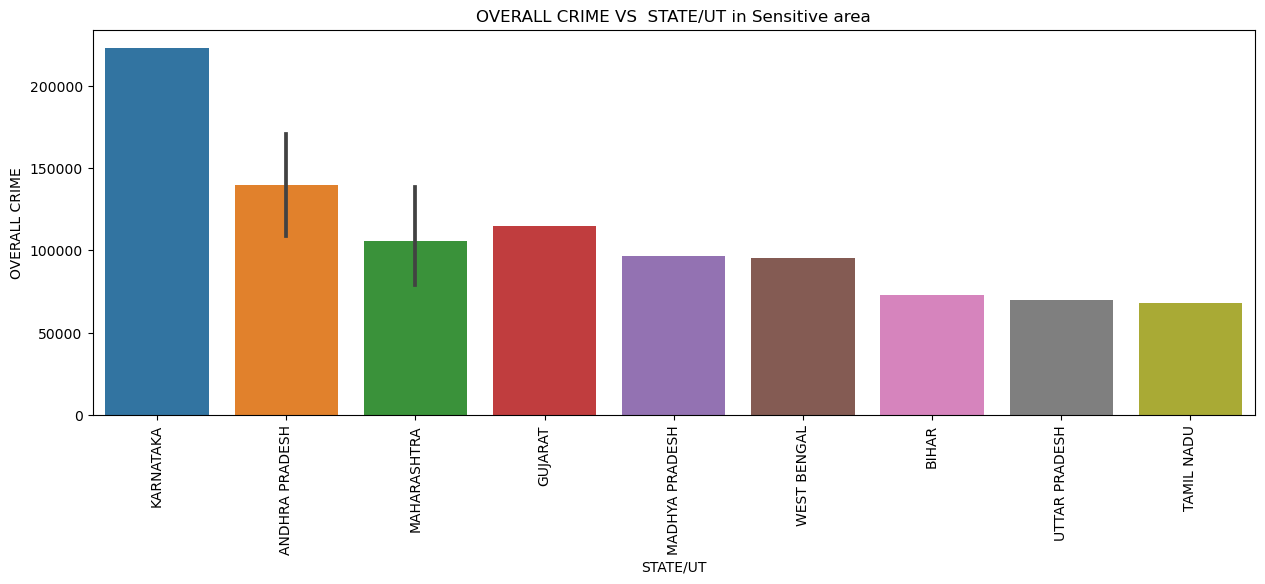

In [95]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='OVERALL CRIME',data=Sensitive_Area)
plt.xticks(rotation='90')
plt.title("OVERALL CRIME VS  STATE/UT in Sensitive area")
plt.show()

#### The top 3 states having highest overall crimes are KATNATAKA, ANDHRA PRADESH and MAHARASTHRA in Sensitive areas. These are the states where maximum number of Murders, Crime against women,Attempt to Murder and Theft cases happened.

#### Top DISTRICTS in CRIME :

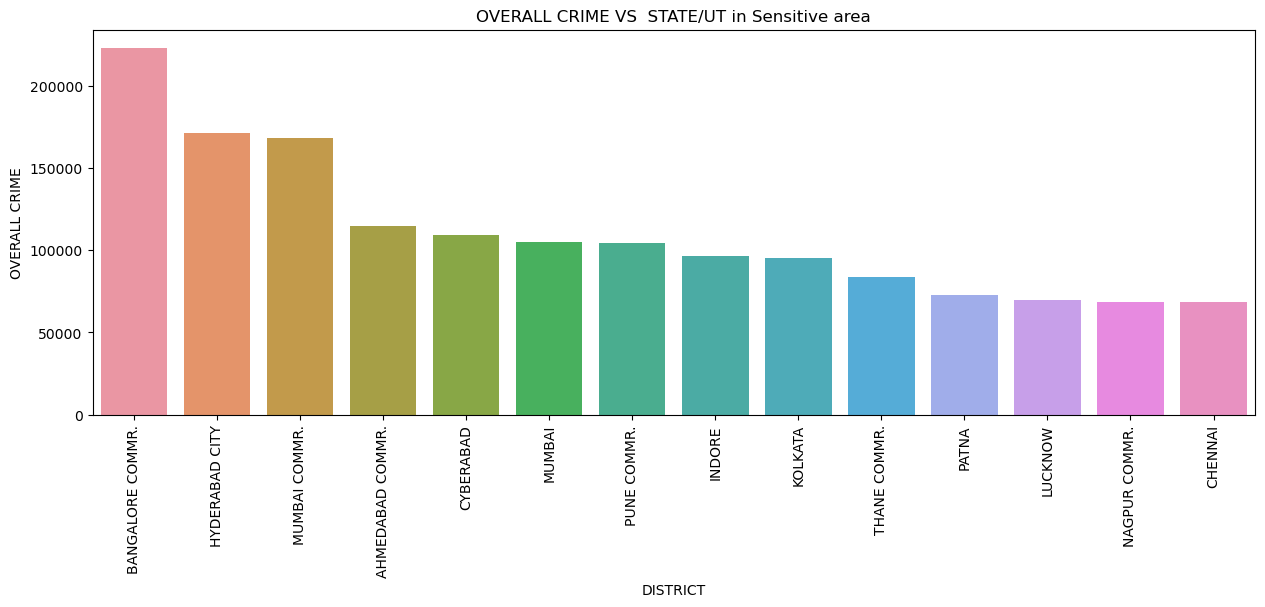

In [96]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='OVERALL CRIME',data=Sensitive_Area)
plt.xticks(rotation='90')
plt.title("OVERALL CRIME VS  STATE/UT in Sensitive area")
plt.show()

#### The top 3 Districts in Sensitive areas are BANGALORE COMMR.,HYDERABAD CITY and MUMBAI COMMR. Districts having maximum overall crimes. As these are the commercial cities having maximum populations which leads to many crime activites.To reduce Crime, the public awareness must be required in these areas and Police needs to give effort to reduce the criminal activities. 

### For Peaceful Area's

In [97]:
Peaceful_Area['OVERALL CRIME']=Peaceful_Area.iloc[:,2:].sum(axis=1)

In [99]:
Peaceful_Area.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)

In [100]:
Peaceful_Area.head(10)

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,OVERALL CRIME
60,ASSAM,BIEO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
293,JAMMU & KASHMIR,RAILWAYS KATRA,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0
294,JAMMU & KASHMIR,RAILWAYS KMR,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0,3.0
291,JAMMU & KASHMIR,RAILWAYS JAMMU,0.0,3.0,0.0,0.0,0.0,0.0,6.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0,0,14.0
292,JAMMU & KASHMIR,RAILWAYS KASHMIR,0.0,0.0,1.0,0.0,0.0,1.0,18.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,0,0,27.0
276,JAMMU & KASHMIR,CRIME KASHMIR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0,0,29.0
700,TRIPURA,GRP,2.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,2.0,0.0,0.0,3.0,0.0,15.0,10,1,42.0
520,NAGALAND,LONGLENG,3.0,9.0,2.0,0.0,1.0,2.0,16.0,1.0,3.0,0.0,0.0,3.0,2.0,2.0,0,0,44.0
256,HIMACHAL PRADESH,CID,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,52.0,13,0,67.0
698,TRIPURA,G.R.P.,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,65.0,0,0,71.0


#### Most Peaceful STATES :

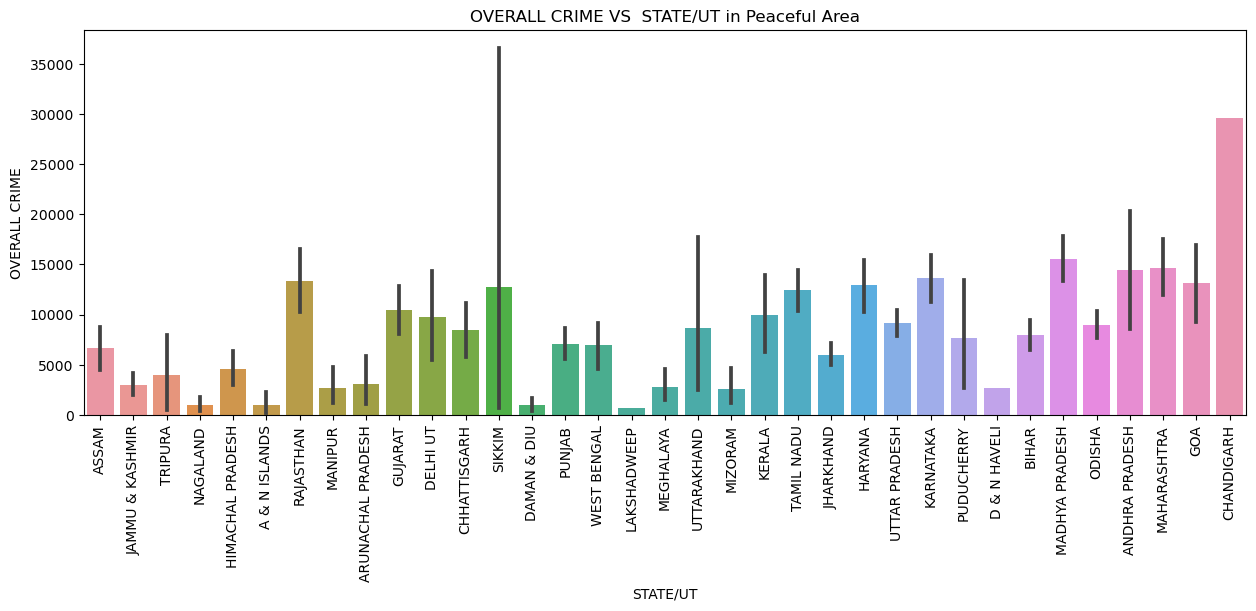

In [101]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='OVERALL CRIME',data=Peaceful_Area)
plt.xticks(rotation='90')
plt.title("OVERALL CRIME VS  STATE/UT in Peaceful Area")
plt.show()

#### The Most Peaceful STATES are LAKSHADWEEP, A&N ISLANDS, NAGALAND and DAMAN&DIU.As these states are of very small area as well as less populated so the crimes are also low here which leads to SAFE for living purposes.

## 4.4 Capstone project overall story in your own words. Min 1000 words.

The Capstone Project is "CRIMES in INDIA".We were already given by some data (CSV files which were compireses  District , Year(2001- 2012) and Diffrent Crime heads.
This Project comprises of 4 parts
1. PHASE-1(Data Collection/preparation part) : -- The population of each state,Literacy Rate in each state,Area of each state were collected from different sources and made the final csv file by merging the collect data and the required data for phase 2 anlysis that is of STATE/Ut wise.
2. PHASE-2(State/UT wise analysis): --
- The State "Kerala" has the Highest Litracy_rate followed by Lakshadweep and Mizoram and "Bihar" has the lowest Literacy_rate over the given period.
- The states Madhya Pradesh, Maharashtra, Andhra Pradesh, Tamil Nadu, Uttar Pradesh, Rajasthan and west Bengal have highest IPC crimes in the given period.
- The States Lakshadweep,A&N Island, Arunachal Pradesh, Nagalad have lowest crimes over the period.
- The state UTTAR PRADESH has the maximum no of MURDERS,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER and KIDNAPPING & ABDUCTION cases registered over the given period followed by Bihar,AndhraPradesh,Maharashtra and MadhyaPradesh.
- MADHYA PRADESH has the maximum no of RAPE cases over the given period followed by WestBengal,UttarPradesh, Maharashtra,Rajasthan,Assam,Bihar and Odisha and JHARKHAND has the maximum no of CUSTODIAL RAPE cases.
- Lakshadweep, A&N Island have minimum RAPE cases so these areas are safe for women.
- BIHAR top in the DACOITY cases over the given period followed by Maharasthra,Jharkhand and UttarPradesh.
- MAHARASHTRA has the maximum no of ROBBERY cases.
- UTTAR PRADESH has the maximum no of DOWRY DEATHS cases registered. So in UP people are of regressive nature and women are not safe there.
- WEST BENGAL has the maximum no of CRUELTY BY HUSBAND OR HIS RELATIVES cases registered which are of large in numbers.
- RAJASTHAN is not safe for SC as the crime against Sc is highest there.
- MADHYA PRADESH is not safe for ST as the crime against Sc is highest there.
- MADHYA PRADESH has the maximum no of Total crime against children cases registered.
3. PHASE-3(SQL Operations): -- In this phase the required SQL operations like table creation, data insertion into the table and finding the data as per conditions has been done.
4. PHASE-4(Unsupervised ML (Clustering)): -- Created 3 clusters
- Sensitive areas - Having maximum no of crimes and not safe for living.KATNATAKA, ANDHRA PRADESH and MAHARASTHRA are top 3 states and BANGALORE COMMR.,HYDERABAD CITY and MUMBAI COMMR. are top 3 Districts which are unsafe for living.
- Moderate Areas - This cluster comprises of  the areas having midium ranges of crimes.
- Peaceful areas - Having minimum no of crimes and safe for living.LAKSHADWEEP, A&N ISLANDS, NAGALAND and DAMAN&DIU are the top States which have very low crimes and are safe for living.
 As India is a diverse country with a population of over 1.38 billion people.So the crimes has a significant role in it.Reducing crimes in India is a complex and multifaceted issue that requires a coordinated effort from various stakeholders, including the government, law enforcement agencies, civil society organizations, and the general public.Awareness campaigns should be conducted to educate people about their rights and responsibilities.
By this project analysis I learnt about various new things.
#### Thank You
 